### Produce figures for simulation results (cleaned)

In [1]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: magrittr


### read tables

In [2]:
ind = read.csv('../results_summary/table_ind_all.txt', sep='\t')
head(ind)

N,P,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean,method
50,50,1.00,0.37,0.54 ( 0.03 ),8.36 ( 0.45 ),0.02 ( 0.01 ),13.34,0.51,0.54,8.36,0.02,lasso
100,50,0.50,0.51,0.36 ( 0.01 ),5.5 ( 0.42 ),0 ( 0 ),10.50,0.37,0.36,5.50,0.00,lasso
500,50,0.10,0.79,0.28 ( 0 ),2.33 ( 0.14 ),0 ( 0 ),7.33,0.15,0.28,2.33,0.00,lasso
1000,50,0.05,0.86,0.26 ( 0 ),1.82 ( 0.13 ),0 ( 0 ),6.82,0.10,0.26,1.82,0.00,lasso
50,100,2.00,0.32,0.66 ( 0.04 ),11.1 ( 0.38 ),0.08 ( 0.03 ),16.02,0.61,0.66,11.10,0.08,lasso
100,100,1.00,0.46,0.41 ( 0.01 ),7.23 ( 0.4 ),0 ( 0 ),12.23,0.46,0.41,7.23,0.00,lasso


In [3]:
toe = read.csv('../results_summary/table_toe_all.txt', sep='\t')
head(toe)

N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean,method
50,50,0.1,1.00,0.36,0.62 ( 0.04 ),8.59 ( 0.46 ),0.02 ( 0.01 ),13.57,0.51,0.62,8.59,0.02,lasso
100,50,0.1,0.50,0.47,0.37 ( 0.01 ),6.3 ( 0.43 ),0 ( 0 ),11.30,0.40,0.37,6.30,0.00,lasso
500,50,0.1,0.10,0.73,0.28 ( 0 ),2.88 ( 0.21 ),0 ( 0 ),7.88,0.20,0.28,2.88,0.00,lasso
1000,50,0.1,0.05,0.89,0.27 ( 0 ),1.66 ( 0.11 ),0 ( 0 ),6.66,0.08,0.27,1.66,0.00,lasso
50,100,0.1,2.00,0.32,0.67 ( 0.05 ),11.84 ( 0.4 ),0 ( 0 ),16.84,0.62,0.67,11.80,0.00,lasso
100,100,0.1,1.00,0.44,0.4 ( 0.01 ),7.71 ( 0.56 ),0 ( 0 ),12.71,0.46,0.40,7.71,0.00,lasso


In [5]:
block = read.csv('../results_summary/table_block_all.txt', sep='\t')
head(block)

N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean,method
50,50,0.1,1.00,0.05,0.36 ( 0.01 ),3.52 ( 0.22 ),4.92 ( 0.08 ),3.60,0.65,0.36,3.52,4.92,lasso
100,50,0.1,0.50,0.18,0.31 ( 0.01 ),2.71 ( 0.25 ),4.4 ( 0.1 ),3.31,0.42,0.31,2.71,4.40,lasso
500,50,0.1,0.10,0.35,0.29 ( 0 ),5.42 ( 0.25 ),1.97 ( 0.11 ),8.45,0.48,0.29,5.42,1.97,lasso
1000,50,0.1,0.05,0.44,0.28 ( 0 ),4.91 ( 0.2 ),1.57 ( 0.09 ),8.34,0.44,0.28,4.91,1.57,lasso
50,100,0.1,2.00,0.06,0.37 ( 0.02 ),4.73 ( 0.22 ),4.79 ( 0.08 ),4.94,0.72,0.37,4.73,4.79,lasso
100,100,0.1,1.00,0.13,0.34 ( 0.01 ),3 ( 0.15 ),4.75 ( 0.09 ),3.25,0.57,0.34,3.00,4.75,lasso


In [15]:
# how many simulation scenarios (divide by number of methods = 4)
nrow(ind)/4; nrow(toe)/4; nrow(block)/4

[1] 16

[1] 80

[1] 80

### Figure 1: conflict in MSE vs. Stab

In [6]:
ind$Ratio = as.factor(ind$Ratio)
toe$Ratio = as.factor(toe$Ratio)
block$Ratio = as.factor(block$Ratio)

In [7]:
ind_mse_fpr <- ggplot(ind, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent Correlation', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

ind_stab_fpr <- ggplot(ind, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent Correlation', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_mse_fpr <- ggplot(toe, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz Correlation', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_stab_fpr <- ggplot(toe, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz Correlation', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))
 
block_mse_fpr <- ggplot(block, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block Correlation', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_stab_fpr <- ggplot(block, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block Correlation', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_point).”

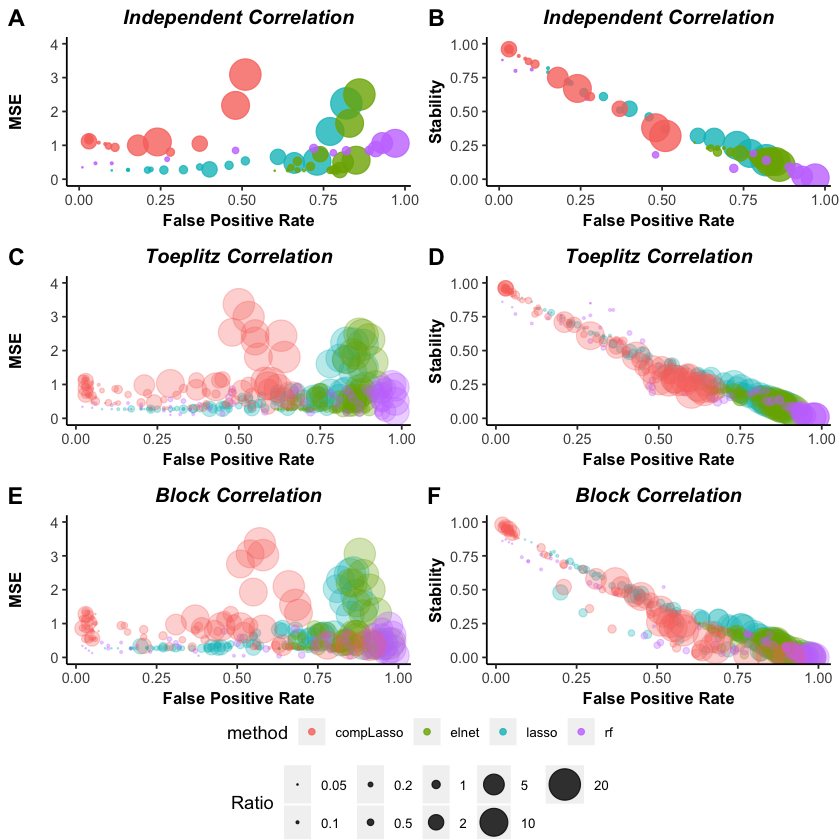

In [9]:
mse_stab_fpr <- ggarrange(ind_mse_fpr, ind_stab_fpr, toe_mse_fpr, toe_stab_fpr, block_mse_fpr, block_stab_fpr,       
  nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 
mse_stab_fpr
ggsave("../ms_writing_figs/mse_stab_fpr_new.png", mse_stab_fpr, dpi = 300, width = 6, height = 6)

### Figure 2: MSE or Stab (which one closer to true FNRs)

In [10]:
ind_mse_fnr <- ggplot(ind, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent Correlation', x='False Negative Rate', y='MSE')  + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

ind_stab_fnr <- ggplot(ind, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent Correlation', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

In [11]:
toe_mse_fnr <- ggplot(toe, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz Correlation', x='False Negative Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_stab_fnr <- ggplot(toe, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz Correlation', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

In [12]:
block_mse_fnr <- ggplot(block, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block Correlation', x='False Negative Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_stab_fnr <- ggplot(block, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block Correlation', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

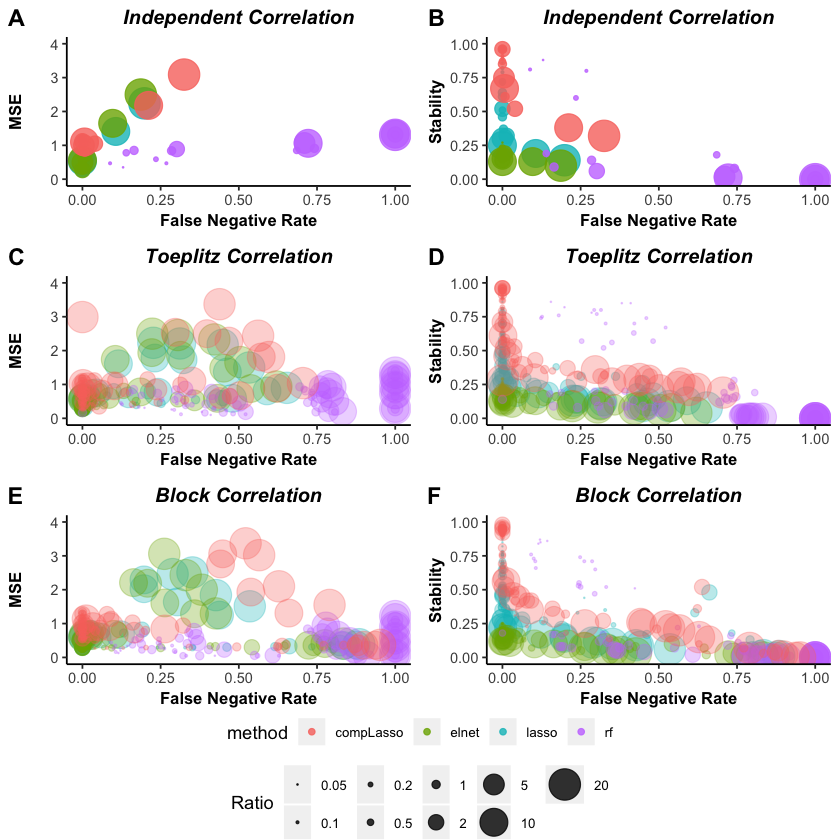

In [13]:
mse_stab_fnr <- ggarrange(ind_mse_fnr, ind_stab_fnr, toe_mse_fnr, toe_stab_fnr, block_mse_fnr, block_stab_fnr,       
  nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 
mse_stab_fnr
ggsave("../ms_writing_figs/mse_stab_fnr_new.png", mse_stab_fnr, dpi = 300, width = 6, height = 6)

### Figure 3: Compare methods based on Stability

In [16]:
toe$N = as.factor(toe$N)
toe$P = as.factor(toe$P)
toe_sub5 = toe[toe$Corr %in% 0.5, ]
toe_sub9 = toe[toe$Corr %in% 0.9, ]

block$N = as.factor(block$N)
block$P = as.factor(block$P)
block_sub5 = block[block$Corr %in% 0.5, ]
block_sub1 = block[block$Corr %in% 0.1, ]

In [222]:
toe5_stab <- ggplot(toe_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe9_stab <- ggplot(toe_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0,1) 

block5_stab <- ggplot(block_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block1_stab <- ggplot(block_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

In [223]:
methods_stab <- ggarrange(toe5_stab, toe9_stab, block5_stab, block1_stab,       
  nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../ms_writing_figs/methods_stab.png", methods_stab, dpi = 300, width = 6, height = 6)

#### supplementary figure: similar results among easy correlations

In [17]:
toe$N = as.factor(toe$N)
toe$P = as.factor(toe$P)
toe_sub1 = toe[toe$Corr %in% 0.1, ]
toe_sub3 = toe[toe$Corr %in% 0.3, ]
toe_sub5 = toe[toe$Corr %in% 0.5, ]
toe_sub7 = toe[toe$Corr %in% 0.7, ]

block$N = as.factor(block$N)
block$P = as.factor(block$P)
block_sub3 = block[block$Corr %in% 0.3, ]
block_sub5 = block[block$Corr %in% 0.5, ]
block_sub7 = block[block$Corr %in% 0.7, ]
block_sub9 = block[block$Corr %in% 0.9, ]

In [27]:
toe1_stab <- ggplot(toe_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe3_stab <- ggplot(toe_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.3, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe5_stab <- ggplot(toe_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe7_stab <- ggplot(toe_sub7, aes(fill=method, y=Stab, x=N)) + ylim(0, 1) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe_easy_stab <- ggarrange(toe1_stab, toe3_stab, toe5_stab, toe7_stab,       
  nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../ms_writing_figs/toe_easy_stab.png", toe_easy_stab, dpi = 300, width = 6, height = 6)

In [28]:
block3_stab <- ggplot(block_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block5_stab <- ggplot(block_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block7_stab <- ggplot(block_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block9_stab <- ggplot(block_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block_easy_stab <- ggarrange(block9_stab, block7_stab, block5_stab, block3_stab,    
  nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../ms_writing_figs/block_easy_stab.png", block_easy_stab, dpi = 300, width = 6, height = 6)

In [26]:
# numerical comparison
# easier correlation (except Toe 0.9 & Block 0.1)
toe_easy = toe[!(toe$Corr %in% 0.9), ]
block_easy = block[!(block$Corr %in% 0.1), ]
toe_hard = toe[toe$Corr %in% 0.9, ]
block_hard = block[block$Corr %in% 0.1, ]

In [27]:
summary(toe_easy[toe_easy$method %in% 'compLasso', 'Stab'])
summary(toe_easy[toe_easy$method %in% 'lasso', 'Stab'])
summary(toe_easy[toe_easy$method %in% 'rf', 'Stab'])
summary(toe_easy[toe_easy$method %in% 'elnet', 'Stab'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2100  0.4250  0.7600  0.6792  0.9300  0.9700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.2575  0.4050  0.4364  0.6225  0.8900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0075  0.1050  0.2353  0.3400  0.8600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0600  0.1300  0.1650  0.1653  0.2025  0.2700 

In [29]:
summary(block_easy[block_easy$method %in% 'compLasso', 'Stab'])
summary(block_easy[block_easy$method %in% 'lasso', 'Stab'])
summary(block_easy[block_easy$method %in% 'rf', 'Stab'])
summary(block_easy[block_easy$method %in% 'elnet', 'Stab'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0700  0.4200  0.8450  0.6764  0.9300  0.9800 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0600  0.2775  0.4450  0.4428  0.6350  0.8700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0650  0.2111  0.2525  0.8700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0300  0.1300  0.1600  0.1573  0.1925  0.2500 

In [31]:
summary(toe_hard[toe_hard$method %in% 'compLasso', 'Stab'])
summary(toe_hard[toe_hard$method %in% 'lasso', 'Stab'])
summary(toe_hard[toe_hard$method %in% 'elnet', 'Stab'])
summary(toe_hard[toe_hard$method %in% 'rf', 'Stab'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1900  0.2925  0.3450  0.4200  0.5825  0.7100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0800  0.1950  0.2850  0.3331  0.4125  0.7600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0400  0.0975  0.1400  0.1575  0.2150  0.2900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0075  0.1150  0.2350  0.2925  0.8500 

In [33]:
summary(block_hard[block_hard$method %in% 'lasso', 'Stab'])
summary(block_hard[block_hard$method %in% 'compLasso', 'Stab'])
summary(block_hard[block_hard$method %in% 'rf', 'Stab'])
summary(block_hard[block_hard$method %in% 'elnet', 'Stab'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.0500  0.1550  0.1875  0.3300  0.4800 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0375  0.1200  0.1581  0.2375  0.5200 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0250  0.1156  0.1825  0.5200 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0275  0.0650  0.0675  0.1075  0.1500 

In [60]:
toe_hard[toe_hard$P %in% c(50, 100) & toe_hard$N %in% 1000, ]
# when N = 50, compLasso highest of 0.32 
# when N = 100, Lasso highest of 0.38
# when N = 500, compLasso highest of 0.67

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean,method
68,1000,50,0.9,0.05,0.76,0.27 ( 0 ),2.71 ( 0.12 ),0 ( 0 ),7.71,0.20,0.27,2.71,0.00,lasso
72,1000,100,0.9,0.1,0.61,0.27 ( 0 ),4.72 ( 0.21 ),0 ( 0 ),9.72,0.35,0.27,4.72,0.00,lasso
148,1000,50,0.9,0.05,0.29,0.26 ( 0 ),12.06 ( 0.52 ),0 ( 0 ),17.06,0.62,0.26,12.00,0.00,elnet
152,1000,100,0.9,0.1,0.26,0.26 ( 0 ),16.05 ( 0.62 ),0 ( 0 ),21.05,0.69,0.26,16.00,0.00,elnet
228,1000,50,0.9,0.05,0.85,0.1 ( 0 ),1.5 ( 0.07 ),2.46 ( 0.06 ),5.04,0.29,0.10,1.50,2.46,rf
232,1000,100,0.9,0.1,0.80,0.12 ( 0 ),2.42 ( 0.11 ),1.89 ( 0.05 ),6.53,0.36,0.12,2.42,1.89,rf
308,1000,50,0.9,0.05,0.71,0.3 ( 0 ),2.18 ( 0.19 ),0 ( 0 ),8.18,0.23,0.30,2.18,0.00,compLasso
312,1000,100,0.9,0.1,0.67,0.3 ( 0 ),2.85 ( 0.24 ),0 ( 0 ),8.85,0.28,0.30,2.85,0.00,compLasso


### Figure 4: pitfall of using MSE for method comparisons

In [61]:
toe9_mse <- ggplot(toe_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab('') + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

block1_mse <- ggplot(block_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ggtitle("Block Correlation 0.1") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

toe9_FN <- ggplot(toe_sub9, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_FN <- ggplot(block_sub1, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6)

toe9_FP <- ggplot(toe_sub9, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positives") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72)

block1_FP <- ggplot(block_sub1, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positives") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72)

In [252]:
methods_mse <- ggarrange(toe9_mse, block1_mse, toe9_FN, block1_FN,toe9_FP, block1_FP,         
  nrow=3, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")  
ggsave("../ms_writing_figs/methods_mse.png", methods_mse, dpi = 300, width = 6, height = 7)

Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

In [65]:
summary(toe_sub9$MSE_mean)
summary(block_sub1$MSE_mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1000  0.2700  0.3000  0.3906  0.5325  1.0400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0500  0.2150  0.3000  0.2622  0.3525  0.4100 

#### use alternative false positive rate or false negative rate

In [44]:
toe9_mse <- ggplot(toe_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab('') + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

block1_mse <- ggplot(block_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ggtitle("Block Correlation 0.1") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

toe9_FNR <- ggplot(toe_sub9, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negative Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_FNR <- ggplot(block_sub1, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negative Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

toe9_FPR <- ggplot(toe_sub9, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positive Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_FPR <- ggplot(block_sub1, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positive Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 


In [47]:
methods_mse_rate <- ggarrange(toe9_mse, block1_mse, toe9_FNR, block1_FNR, toe9_FPR, block1_FPR,         
  nrow=3, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")  
ggsave("../ms_writing_figs/methods_mse_rate.png", methods_mse_rate, dpi = 300, width = 6, height = 7)

Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”

### updated calculation of False positive rate

In [47]:
toe9_mse <- ggplot(toe_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab('') + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1.05)

block1_mse <- ggplot(block_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ggtitle("Block Correlation 0.1") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1.05) 

toe9_FNR <- ggplot(toe_sub9, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negative Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_FNR <- ggplot(block_sub1, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("False Negative Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

toe9_FPR <- ggplot(toe_sub9, aes(fill=method, y=FDR, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positive Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_FPR <- ggplot(block_sub1, aes(fill=method, y=FDR, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("False Positive Rate") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 


In [48]:
methods_mse_rate <- ggarrange(toe9_mse, block1_mse, toe9_FNR, block1_FNR, toe9_FPR, block1_FPR,         
  nrow=3, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")  
ggsave("../ms_writing_figs/methods_mse_rate_new.png", methods_mse_rate, dpi = 300, width = 6, height = 7)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”